In [1]:
import numpy as np
import pandas as pd

# Reading the Data

In [2]:
data_imdb = pd.read_csv('imdb_labelled.txt', delimiter = '\t', header = None)
data_imdb.columns = ['Review Text', 'Review Class']

data_amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter = '\t', header = None)
data_amazon.columns = ['Review Text', 'Review Class']


data_yelp = pd.read_csv('yelp_labelled.txt', delimiter = '\t', header = None)
data_yelp.columns = ['Review Text', 'Review Class']

data = pd.concat([data_imdb, data_amazon, data_yelp])
data.head()

,Review Text,Review Class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
data.shape

(2748, 2)

# Pre-processing Text Data

### Pre-processing Our Text Reviews

In [4]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [5]:
all_reviws  = list()

# Add all the reviews to a list
lines = data['Review Text'].values.tolist()

# First element of the list is our first review from data
lines[0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [6]:
import nltk
# The punkt tokenizer is a pre-trained model used by NLTK to split text into sentences, 
# which is necessary before tokenizing the text into words.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/likhithaveganti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def clean_text(df):
    all_reviews = list()
    lines = df["Review Text"].values.tolist()
    for text in lines:
        
        # converting to lower case
        text = text.lower()
        
        # Getting rid of all the links in the review
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        # Removing all the punctuations
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        
        # Tokenizing the words
        tokens = word_tokenize(text)
        
        # Remove all the punctuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        
        # Remove all the words that are not alphabets
        words = [word for word in stripped if word.isalpha()]
        
        # Removing all the stopwords from english as the dataset is english dataset.
        stop_words = set(stopwords.words("english"))
        
        # Discard 'not' word too as it can impact the analysis
        stop_words.discard("not")
        
        # Stemming - Taking only the root words
        PS = PorterStemmer()
        
        # Combining tokens to a string
        words = [PS.stem(w) for w in words if not w in stop_words]
        words = ' '.join(words)
        all_reviews.append(words)
        
    return all_reviews

all_reviews = clean_text(data)

# printing first 20 sentences
all_reviews[:20]

['slowmov aimless movi distress drift young man',
 'not sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost nonexist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act postproduct edit direct aspect filmmak',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema think film some

In [8]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Build our Vocabulary and Feature matrix

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating an object of TfidfVectorizer
# min_df = 3 means taking all the words that occured atleast thrice.
TV = TfidfVectorizer(min_df=3, ngram_range=(1, 2))  # Use bi-grams
 

# Applying reviews to this object to build our feature matrix
X = TV.fit_transform(all_reviews).toarray()

# Target Vector
y = data["Review Class"].to_numpy()

print(np.shape(X))
print(np.shape(y))

(2748, 1509)
(2748,)


### Splitting the Data

In [10]:
from sklearn.model_selection import train_test_split

# Splitting the data to Train and Test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((2198, 1509), (550, 1509))

### Best Feature Selection

In [11]:
from sklearn.feature_selection import SelectKBest, chi2

fs = SelectKBest(score_func=chi2, k=1000)
X_train_selected = fs.fit_transform(X_train, y_train)
X_test_selected = fs.transform(X_test)
X_train_selected.shape, X_test_selected.shape

((2198, 1000), (550, 1000))

# Fitting the Machine Learning Model

### Naive Bayes Model

In [12]:
# Naive Bayes is regarded as one of the best NLP Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train_selected,y_train)

y_pred = model.predict(X_test_selected)

from sklearn.metrics import accuracy_score, f1_score, precision_score
print('Accuracy Score is',accuracy_score(y_test, y_pred))
print('F1 Score is',f1_score(y_test, y_pred))
print('Precision Score is',precision_score(y_test, y_pred))

Accuracy Score is 0.7418181818181818
F1 Score is 0.7455197132616487
Precision Score is 0.7074829931972789


### Decision Tree Model

In [13]:
# Trying Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", random_state=41)

model.fit(X_train_selected,y_train)

y_pred = model.predict(X_test_selected)

from sklearn.metrics import accuracy_score, f1_score, precision_score
print('Accuracy Score is',accuracy_score(y_test, y_pred))
print('F1 Score is',f1_score(y_test, y_pred))
print('Precision Score is',precision_score(y_test, y_pred))

Accuracy Score is 0.7727272727272727
F1 Score is 0.7544204322200394
Precision Score is 0.7836734693877551


### Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Corrected to only include valid options
    'max_depth': [10, 20, 30, None]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


In [15]:
# Initialize the Random Forest Classifier with the best parameters
optimized_rf = RandomForestClassifier(
    n_estimators=100, 
    max_features='log2', 
    max_depth=None, 
    random_state=42
)

# Fit the model on the training data
optimized_rf.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = optimized_rf.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Accuracy: 0.8109090909090909
F1 Score: 0.7952755905511812
Precision: 0.8278688524590164


### Support Vector Classifier

In [16]:
# Trying Support Vector Classifier
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Accuracy: 0.8145454545454546
F1 Score: 0.7976190476190477
Precision: 0.8375


### Neural Network

In [17]:
import numpy as np
import tensorflow as tf
import random as python_random

def set_seed(seed_value):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    python_random.seed(seed_value)

In [24]:
# Simple Neural Network Model
from keras.models import Sequential
from keras.layers import Dense, Dropout

set_seed(42)

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train_selected.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with early stopping callback
history = model.fit(X_train_selected, y_train, epochs=5, batch_size=64, validation_data=(X_test_selected, y_test))
loss, accuracy = model.evaluate(X_test_selected, y_test)
print('\n')
print('Accuracy:', accuracy)

Epoch 1/5
35/35 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5514 - val_loss: 0.6641 - val_accuracy: 0.7582
Epoch 2/5
35/35 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7944 - val_loss: 0.4229 - val_accuracy: 0.8218
Epoch 3/5
35/35 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8940 - val_loss: 0.4750 - val_accuracy: 0.8182
Epoch 4/5
35/35 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9322 - val_loss: 0.5157 - val_accuracy: 0.8109
Epoch 5/5
18/18 [==============================] - 0s 712us/step - loss: 0.5913 - accuracy: 0.8164


Accuracy: 0.8163636326789856


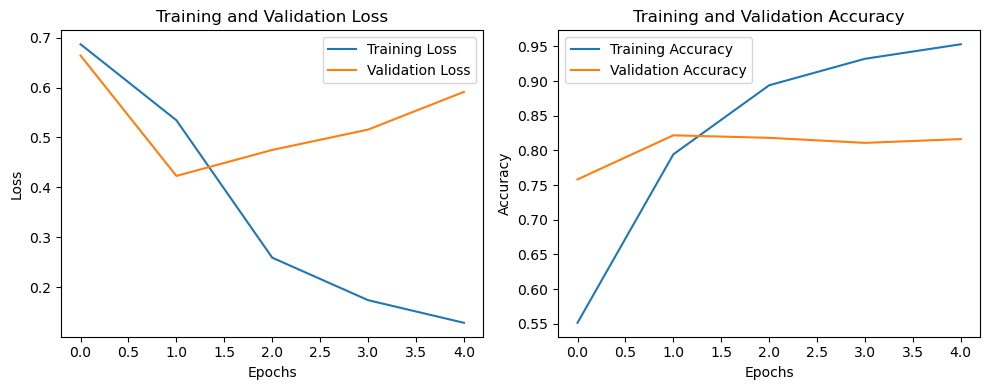

In [25]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
from keras.callbacks import EarlyStopping

set_seed(42)

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train_selected.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Fit the model with early stopping callback
history = model.fit(X_train_selected, y_train, epochs=10, batch_size=64, validation_data=(X_test_selected, y_test), callbacks=[early_stopping])
loss, accuracy = model.evaluate(X_test_selected, y_test)
print('\n')
print('Accuracy:', accuracy)

Epoch 1/10
35/35 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5514 - val_loss: 0.6641 - val_accuracy: 0.7582
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7944 - val_loss: 0.4229 - val_accuracy: 0.8218
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8940 - val_loss: 0.4750 - val_accuracy: 0.8182
Epoch 4/10
18/18 [==============================] - 0s 640us/step - loss: 0.4229 - accuracy: 0.8218


Accuracy: 0.8218181729316711
